# **MACHINE LEARNING MODELS FOR CAR EVALUATION DATASET**

Importing modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read csv file contaning dataset

In [ ]:
csv_filename="car.data"
data=pd.read_csv(csv_filename,
              names=["Buying", "Maintenance" , "Doors" , "Persons" , "Lug-Boot" , "Safety", "Class"])

Study Dataset

In [ ]:
data.head()

,Buying,Maintenance,Doors,Persons,Lug-Boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Check for null values in Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1728 non-null   object
 1   Maintenance  1728 non-null   object
 2   Doors        1728 non-null   object
 3   Persons      1728 non-null   object
 4   Lug-Boot     1728 non-null   object
 5   Safety       1728 non-null   object
 6   Class        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


We have all categorical columns, so we check unique values for each column.

In [ ]:
print(data.columns)

Index(['Buying', 'Maintenance', 'Doors', 'Persons', 'Lug-Boot', 'Safety',
       'Class'],
      dtype='object')


In [ ]:
print("Count \t  Unique Values")
for i in data.columns:
    print(data[i].nunique(),"\t",data[i].unique())


Count 	  Unique Values
4 	 ['vhigh' 'high' 'med' 'low']
4 	 ['vhigh' 'high' 'med' 'low']
4 	 ['2' '3' '4' '5more']
3 	 ['2' '4' 'more']
3 	 ['small' 'med' 'big']
3 	 ['low' 'med' 'high']
4 	 ['unacc' 'acc' 'vgood' 'good']


Check distrubution of different unique categories in each column

In [ ]:
for i in data.columns:
    print(data[i].value_counts())
    print()

med      432
low      432
high     432
vhigh    432
Name: Buying, dtype: int64

med      432
low      432
high     432
vhigh    432
Name: Maintenance, dtype: int64

4        432
5more    432
2        432
3        432
Name: Doors, dtype: int64

4       576
2       576
more    576
Name: Persons, dtype: int64

med      576
big      576
small    576
Name: Lug-Boot, dtype: int64

med     576
low     576
high    576
Name: Safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: Class, dtype: int64



We now see that all columns except column "Class" has equal distribution. Countplot of column "Class" is as follows-

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


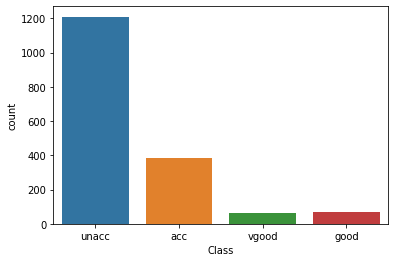

In [ ]:
sns.countplot(data['Class'])

Plotting how column "Class" is distributed alongside each feature

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

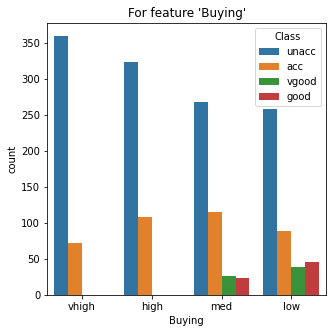

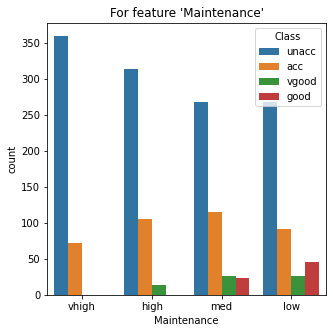

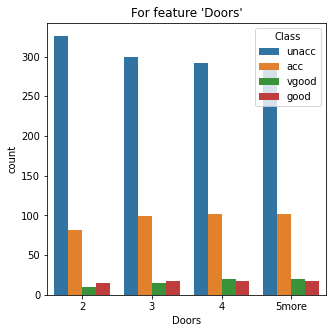

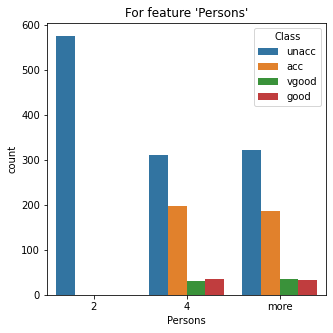

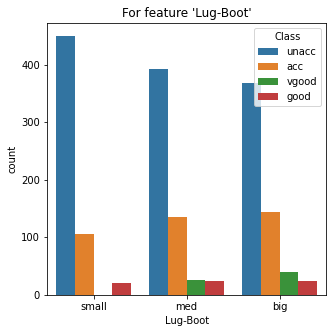

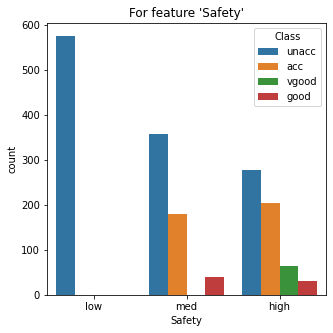

In [ ]:
for i in data.columns[:-1]:
    plt.figure(figsize=(5,5))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['Class'])

Performing Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [ ]:
data.head()

,Buying,Maintenance,Doors,Persons,Lug-Boot,Safety,Class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


Plotting heatmap of the columns with each other

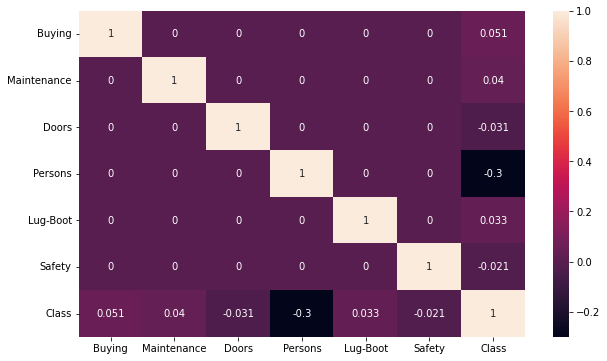

In [ ]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [ ]:
X=data[data.columns[:-1]]   #dataframe containing input features
y=data['Class'] #output feature to be predicted

In [ ]:
X.head()

,Buying,Maintenance,Doors,Persons,Lug-Boot,Safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [ ]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

Split data into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Importing modules for different models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV , learning_curve

### **Logistic Regression**

In [ ]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [ ]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred=logreg.predict(X_test)


In [ ]:
logreg.score(X_test,y_test)

0.6647398843930635

The basic logistic regression model gives very less accuracy.We now check the learning curve.

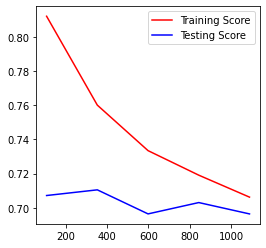

In [ ]:
lc=learning_curve(logreg,X_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(4,4))
plt.plot(size,train_score,color="red",label="Training Score")
plt.plot(size,test_score,color="blue",label="Testing Score")
plt.legend()

Train accuracy is decreasing with increasing sample size. This is not a good model for this dataset.

Performing Grid Search to get best parameters

In [ ]:
param_grid={'C':[0.01,0.1,1,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}
grid=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)


In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.01, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
0.7096807379719489


The accuracy increases a little but is still not satisfactory. So we try other models.

### **KNN Classifier**

In [ ]:
knn=KNeighborsClassifier(n_jobs=-1)

In [ ]:
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)


0.9017341040462428

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       118
           1       0.77      0.53      0.62        19
           2       0.93      0.99      0.96       358
           3       1.00      0.50      0.67        24

    accuracy                           0.90       519
   macro avg       0.88      0.70      0.76       519
weighted avg       0.90      0.90      0.90       519



The default KNN model gives 90% and better F-1 score so this is better than previous model.

Performing Grid Search to get best parameters

In [ ]:
param_grid={
    'n_neighbors':[3,4,5,6,7,8,9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
grid=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param_grid)


In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}
0.905709680737972


Fitting model for Test Set

In [ ]:
pred=grid.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       118
           1       1.00      0.58      0.73        19
           2       0.94      0.98      0.96       358
           3       0.90      0.75      0.82        24

    accuracy                           0.92       519
   macro avg       0.92      0.78      0.83       519
weighted avg       0.92      0.92      0.91       519



KNN gives accuracy around 90.57%.

### **SVM**

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred=svc.predict(X_test)
svc.score(X_test,y_test)

0.8940269749518305

Grid Search for best parameters

In [ ]:
param_grid={
    'C': [0.01,0.1,1,10,100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2,3,5,7,10]
    }

In [ ]:
grid_svm=GridSearchCV(estimator=SVC(random_state=42),param_grid=param_grid)
grid_svm.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'degree': [2, 3, 5, 7, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid_svm.best_params_)
print(grid_svm.best_score_)

{'C': 100, 'degree': 2, 'kernel': 'rbf'}
0.989245910634066


In [ ]:
pred_svm=grid_svm.predict(X_test)
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       118
           1       0.82      0.95      0.88        19
           2       1.00      1.00      1.00       358
           3       0.96      0.92      0.94        24

    accuracy                           0.99       519
   macro avg       0.94      0.96      0.95       519
weighted avg       0.99      0.99      0.99       519



Accuracy is around 98.92% for SVM

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred=dtree.predict(X_test)
dtree.score(X_test,y_test)

0.9710982658959537

In [ ]:
dtree.get_depth()
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

Default accuracy for DecisionTreeClassifier is 97.10%

Performing grid search to get best parameters

In [ ]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,14,20],
           'max_features':['auto', 'sqrt', 'log2',None],
           'max_leaf_nodes':[2,3,None]}

In [ ]:
grid_dt=GridSearchCV(estimator=DecisionTreeClassifier(random_state=51),
                  param_grid=param_grid)

In [ ]:
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=51,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [ ]:
print(grid_dt.best_params_)
print(grid_dt.best_score_)

{'criterion': 'gini', 'max_depth': 14, 'max_features': None, 'max_leaf_nodes': None}
0.974349302150132


In [ ]:
pred_dt=grid_dt.predict(X_test)
print(classification_report(y_test,pred_dt))


              precision    recall  f1-score   support

           0       0.93      0.94      0.94       118
           1       0.71      0.89      0.79        19
           2       1.00      0.99      0.99       358
           3       0.90      0.79      0.84        24

    accuracy                           0.97       519
   macro avg       0.89      0.90      0.89       519
weighted avg       0.97      0.97      0.97       519



In [ ]:
pred_dt=grid_dt.predict(X_train)
print(classification_report(y_train,pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       312
           1       0.91      0.97      0.94        69
           2       1.00      1.00      1.00       850
           3       0.97      0.92      0.94        65

    accuracy                           0.99      1296
   macro avg       0.96      0.97      0.96      1296
weighted avg       0.99      0.99      0.99      1296



Here the improved accuracy comes out to be 97.43%

We now plot the learning curve.

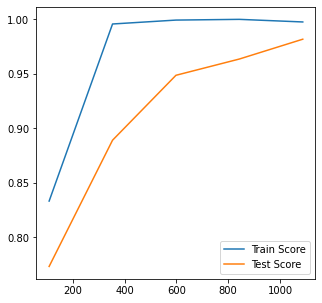

In [ ]:
from sklearn.model_selection import learning_curve
lc=learning_curve(grid_dt,X_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(5,5))
plt.plot(size,train_score,label="Train Score")
plt.plot(size,test_score,label="Test Score")
plt.legend(loc='lower right')

### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [ ]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

In [ ]:
rfc.fit(X_train,y_train)
print("Accuracy: ",rfc.score(X_test,y_test))
print("F1 Score: ",f1_score(y_test,rfc.predict(X_test),average='macro'))

Accuracy:  0.9730250481695568
F1 Score:  0.9245337130459484


Basic RFC model is giving around 97.3% accuracy

Performing grid search to get best parameters

In [ ]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':['auto', 'sqrt', 'log2',None],
           'max_leaf_nodes':[2,3,None]}

In [ ]:
grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),
                  param_grid=param_grid,cv=10,n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=False, random_state=51,
                                    

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None}
0.9826170798898073


In [ ]:
pred=grid.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       118
           1       0.63      0.89      0.74        19
           2       1.00      0.99      0.99       358
           3       0.88      0.88      0.88        24

    accuracy                           0.96       519
   macro avg       0.86      0.91      0.88       519
weighted avg       0.96      0.96      0.96       519



We have now reached 98.26% accuracy with RFC model

### **Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier

rfc=RandomForestClassifier(random_state=42,criterion = 'entropy', max_depth = 10, max_features = 6, max_leaf_nodes = None)
knn = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 6, weights = 'distance')
dtree = DecisionTreeClassifier(criterion = 'gini', max_depth = 14, max_features = None, max_leaf_nodes = None)
svc = SVC(C = 100, degree = 2, kernel = 'rbf',probability=True)
ensemble=VotingClassifier(estimators=[('Random Forest', rfc), ('Decision Tree', dtree), ('SVC', svc)],
                       voting='soft',weights = [3,3,4]).fit(X_train,y_train)


In [ ]:
print(ensemble.score(X_test,y_test))
print('The accuracy for DecisionTree, Random Forest,SVC and KNN is:',ensemble.score(X_test,y_test))
pred=ensemble.predict(X_test)
print(classification_report(y_test,pred))

0.9730250481695568
The accuracy for DecisionTree, Random Forest,SVC and KNN is: 0.9730250481695568
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       118
           1       0.77      0.89      0.83        19
           2       1.00      0.99      1.00       358
           3       0.91      0.88      0.89        24

    accuracy                           0.97       519
   macro avg       0.91      0.93      0.92       519
weighted avg       0.97      0.97      0.97       519



### **Conclusion**

SVM Classifier is the best suited model for this data as we have best accuracy and F-1 scores for the same.
Best parameters are-
{'C': 100, 'degree': 2, 'kernel': 'rbf'}
*   C: 100
*   degree: 2
*   kernel: rbf

Accuracy achieved is 98.92%.

Random Forest Classifier model is also not bad for for this data as we have good accuracy and F-1 scores for the same too.
Best parameters are-
*   n_estimators: 50
*   criterion: entropy
*   max_features: None
*   max_leaf_nodes: None

We are able to achieve 98.26% accuracy with this model